<a href="https://colab.research.google.com/github/LokiAndere/MIARFID-VPC-2019-20/blob/master/squeezenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import keras.backend as BCKN
from keras.models import Model
from keras.layers import Input, Concatenate
from keras.layers import Dense, Conv2D
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import ReLU, Softmax
from keras.utils.vis_utils import plot_model

**Squeeze Net**

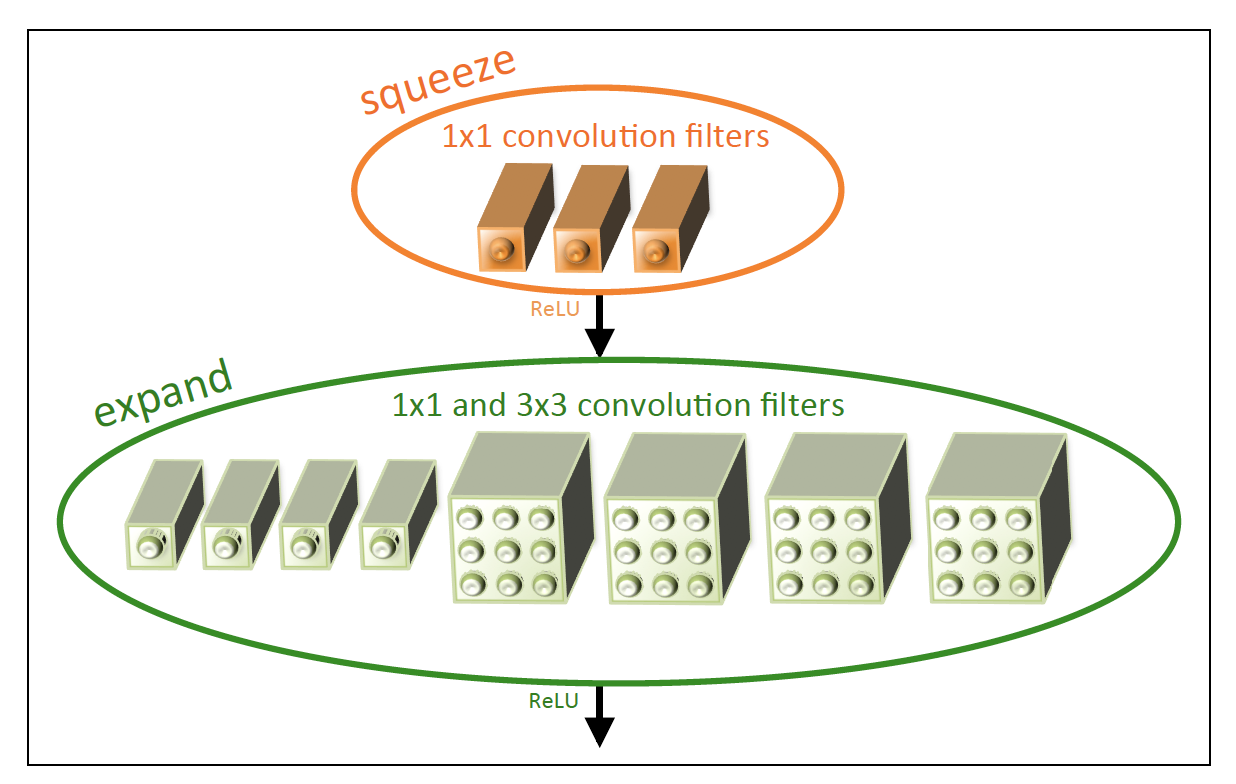

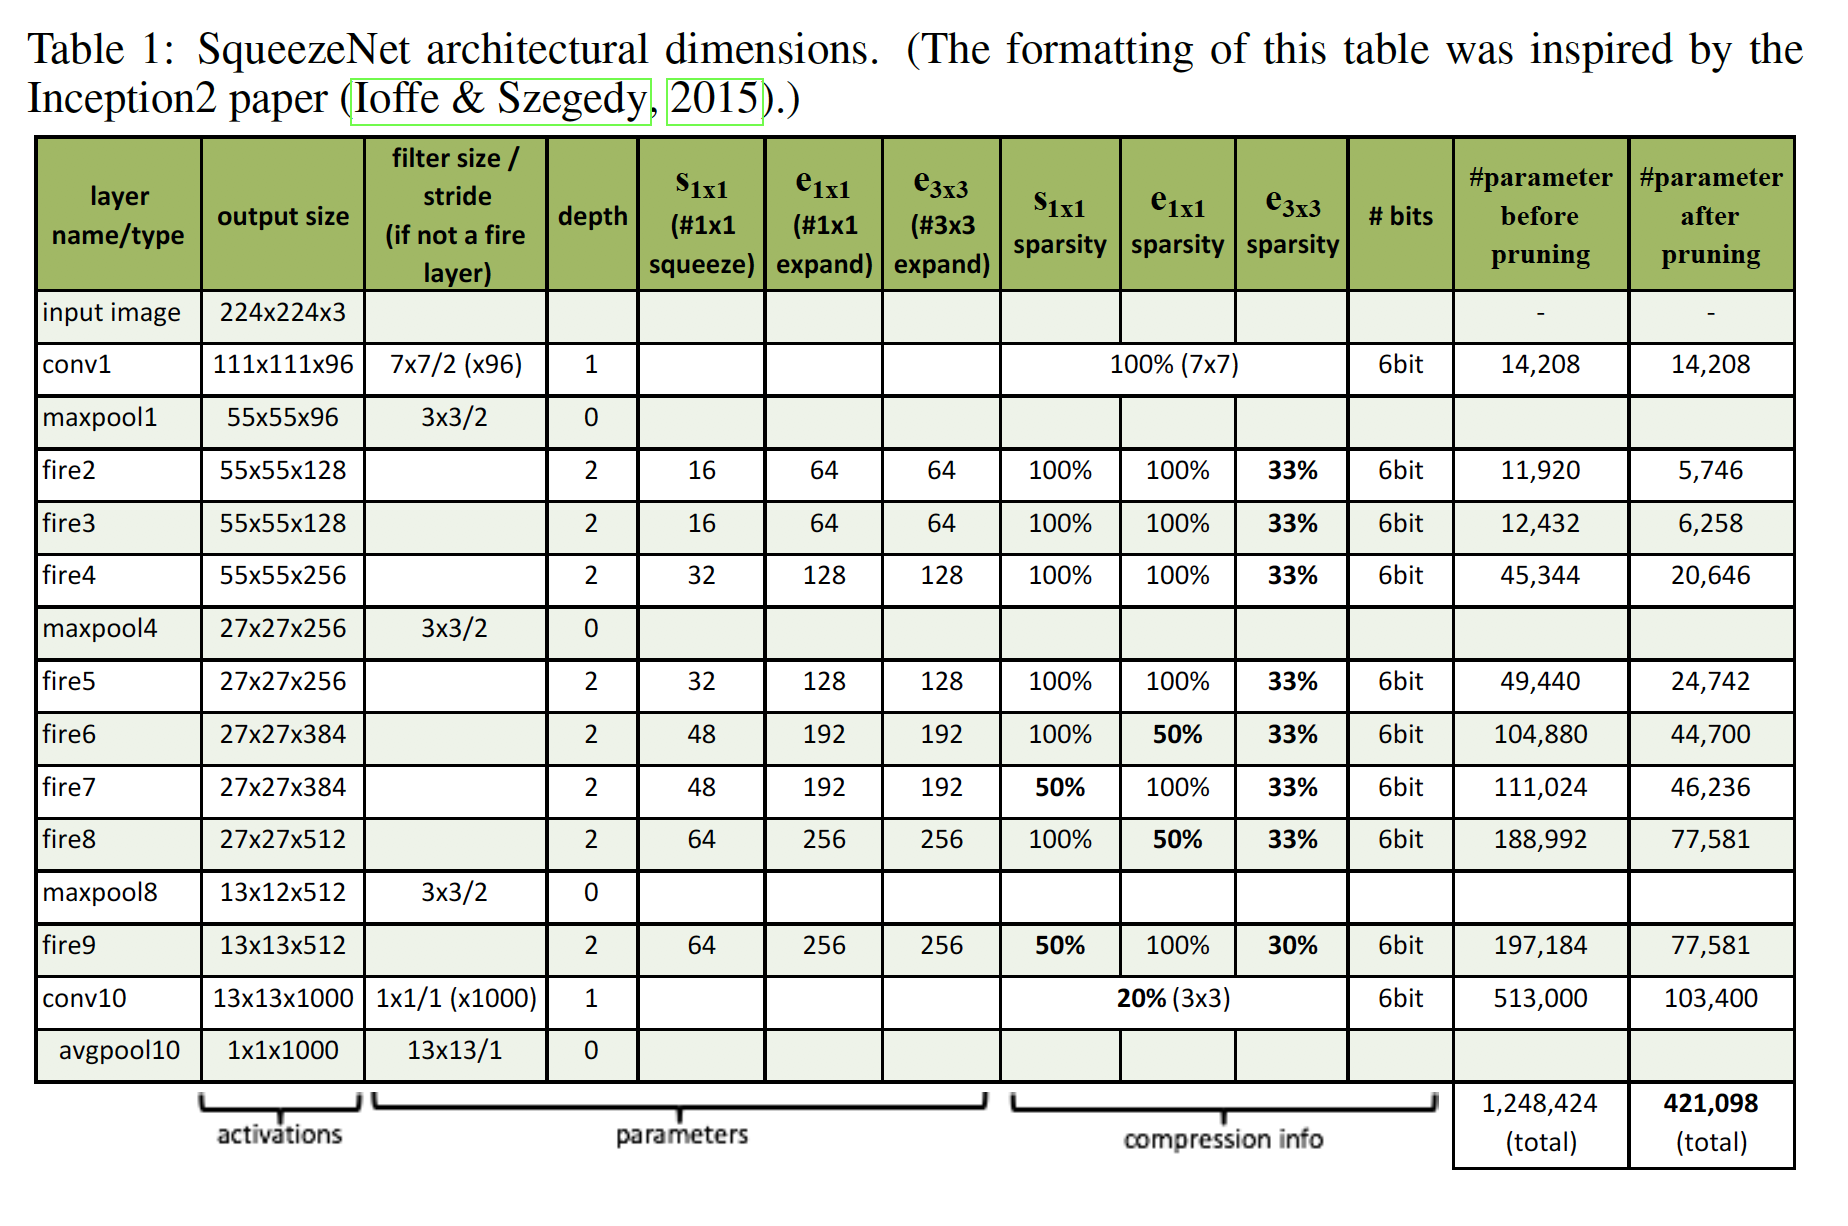

In [0]:
def SNet (shape, num_classes):

  #convolution relu block
  def CR (model, filters, kernal=1, stride=1, padd='valid'):
    model = Conv2D(filters, kernal, strides=stride, padding=padd) (model)
    model = ReLU() (model)
    return model

  #fire block
  #it has different steps, the squeeze and expant parts
  def FB(model, filtSqueeze, filtExpandd):
    squee = CR(model, filtSqueeze)
    expa1 = CR(squee, filtExpandd)
    expa3 = CR(squee, filtExpandd, 3, 1, 'same')
    model = Concatenate() ([expa1, expa3])
    return model

  #it is 16*1 16*2 ...
  #and previous*4 pre*4 ...
  #but we do not get any advantage out of automization
  coe1 = 16, 32, 48, 64
  coe2 = 64,128,192,256

  first = Input(shape)
  model = CR(first, 96, 7, 2, 'same')
  model = MaxPooling2D(3, strides=2, padding='same') (model)
  model = FB(model, coe1[0], coe2[0])
  model = FB(model, coe1[0], coe2[0])
  model = FB(model, coe1[1], coe2[1])
  model = MaxPooling2D(3, strides=2, padding='same') (model)
  model = FB(model, coe1[1], coe2[1])
  model = FB(model, coe1[2], coe2[2])
  model = FB(model, coe1[2], coe2[2])
  model = FB(model, coe1[3], coe2[3])
  model = MaxPooling2D(3, strides=2, padding='same') (model)
  model = FB(model, coe1[3], coe2[3])
  model = Conv2D(num_classes, 1) (model)
  #this model is tailless causee we use
  #the convolution as fully connected layer
  model = GlobalAveragePooling2D() (model)
  last = Softmax() (model)
  final = Model(first, last)

  return final

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 112, 112, 96) 14208       input_1[0][0]                    
__________________________________________________________________________________________________
re_lu_1 (ReLU)                  (None, 112, 112, 96) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 56, 56, 96)   0           re_lu_1[0][0]                    
____________________________________________________________________________________________

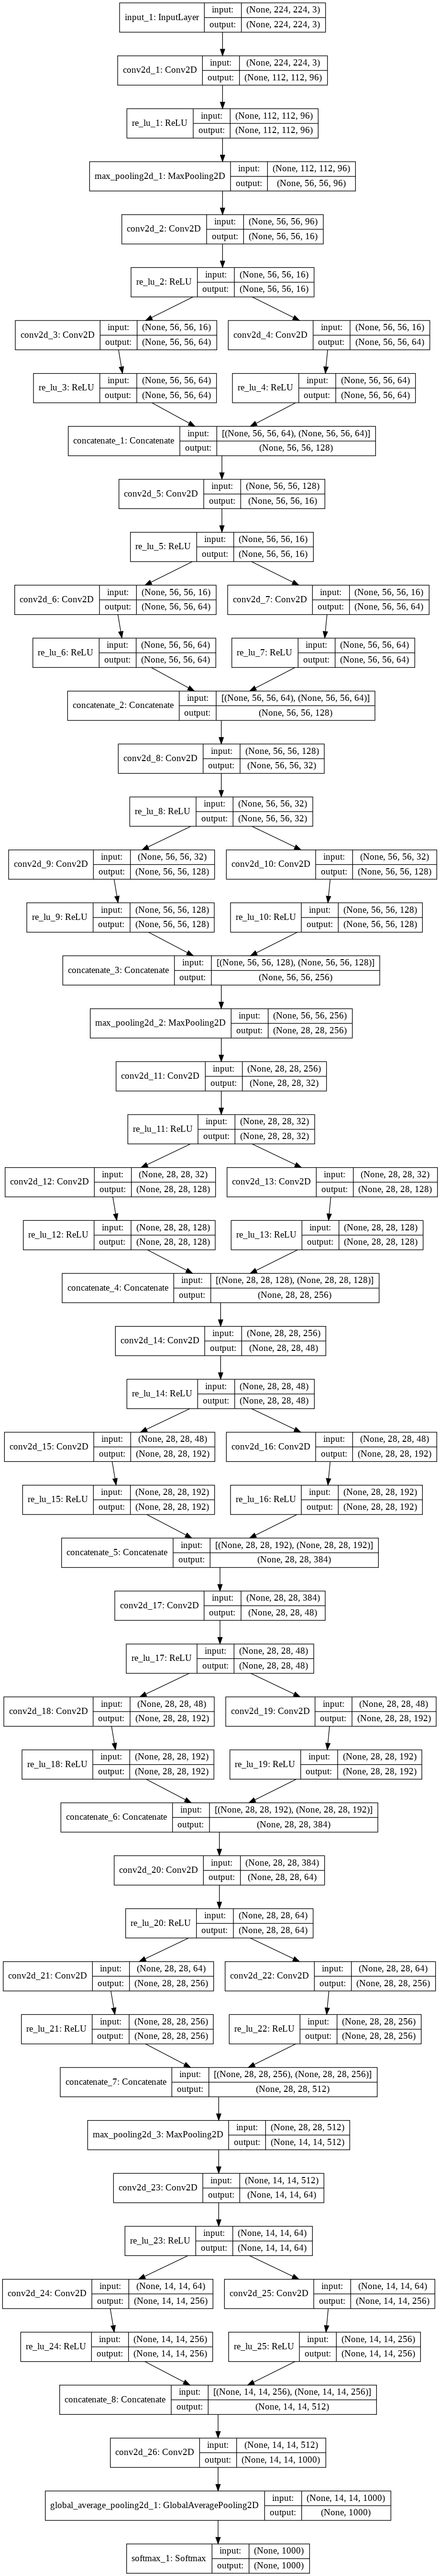

In [0]:
shape = (224, 224, 3)
num_classes = 1000
BCKN.clear_session()
model = SNet(shape, num_classes)
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)